## Introduction

EDA for EARTHDATA-MERRA2

How to read netCDF4  file:  file:https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python


## Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from netCDF4 import Dataset
import cartopy.crs as ccrs

In [2]:
data = Dataset("../data/earthdata-merra2-co/MERRA2_400.tavgM_2d_chm_Nx.202004.nc4", more="r")

### Data extraction

In [3]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Mon May 11 22:32:49 2020 GMT
    Filename: MERRA2_400.tavgM_2d_chm_Nx.202004.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_chm_Nx.monthly.202004.nc4
    Source: CVS tag: GEOSadas-5_12_4_p23_sp3_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXCHM
    RangeBeginningDate: 2020-04-01
    RangeEndingDate: 2020-04-30
    GranuleID: MERRA2_400.tavgM_2d_chm_Nx.202004.nc4
    ProductionDateTime: Original file generated: Mon May 11 22:32:49 2020 GMT
    LongName: MERRA2 tavg1_2d_chm_Nx: 2d,3-Hourly,Time-Averag

Filter atmospheric lat/lon/time/ and variables

In [4]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
time = data.variables['time'][:]
COCL = data.variables['COCL'][:,:,:]; COCL = COCL[0,:,:]
COEM = data.variables['COEM'][:,:,:]; COEM = COEM[0,:,:]
COLS = data.variables['COLS'][:,:,:]; COLS = COLS[0,:,:]
TO3 =  data.variables['TO3'][:,:,:];  TO3 =  TO3[0,:,:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
len(lons), len(lats), len(time), len(COCL), len(COEM), len(COLS), len(TO3)

(576, 361, 1, 361, 361, 361, 361)

In [6]:
print(f"Latitudes: {len(lats)}, vals[:]: {len(COCL[0])}, Longitudes: {len(lons)}, vals[:,:]: {len(COCL[0])}")

Latitudes: 361, vals[:]: 576, Longitudes: 576, vals[:,:]: 576


## Plot data

In [7]:
def plot_merra_data(data, title='', date='April 2020'):
    fig = plt.figure(figsize=(16,8))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')
    plt.contourf(lons, lats, data, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    plt.title(f'MERRA-2 {title} levels, {date}', size=14)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label('K',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)

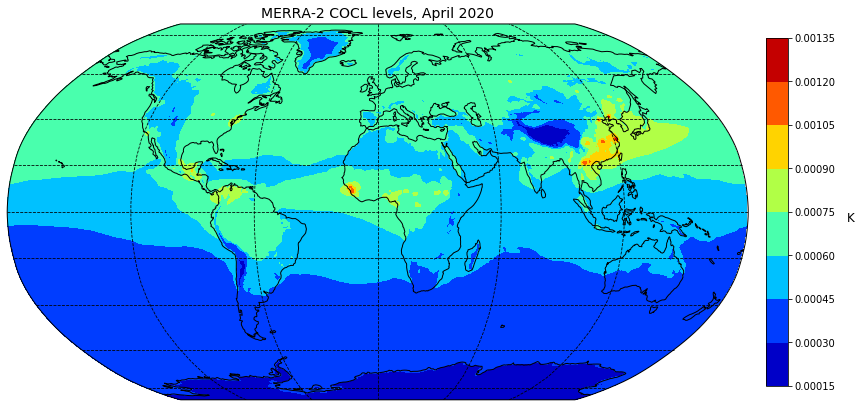

In [8]:
plot_merra_data(COCL, 'COCL')

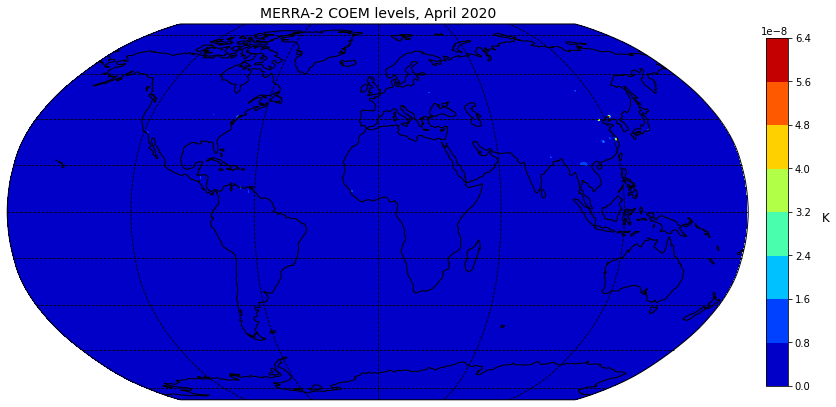

In [9]:
plot_merra_data(COEM, 'COEM')

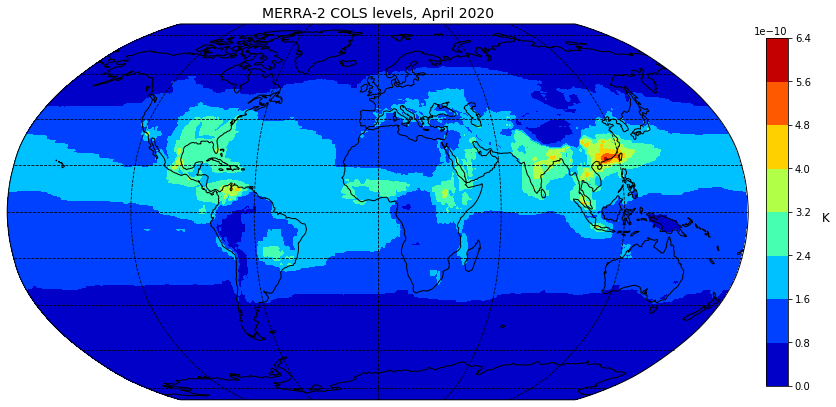

In [10]:
plot_merra_data(COLS, 'COLS')

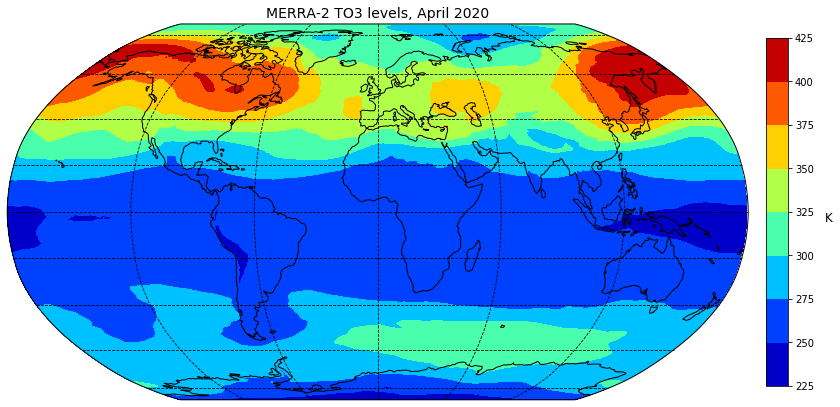

In [11]:
plot_merra_data(TO3, 'TO3')